## Библиотека Pandas


![](http://tripkendall.com/wp-content/uploads/2018/01/pandas_logo-1080x675.jpg)

 - [Pandas](http://pandas.pydata.org/) - библиотека для обработки и анализа данных.
 
Загрузка любой библиотеки выглядит следующим образом: <br /> 
**import** название [**as** псевдоним]

Обычно список импортируемых библиотек задается в самом начале ноутбука, но мы тут с вами повторяли всякое былое, поэтому импортируем, где придется

In [1]:
# для начала импортируем одну замечательную библиотеку
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
# загрузили библиотеку и задали ее псевдоним, по которому далее к ней будем обращаться: pd
import pandas as pd

In [3]:
# команда, чтобы картинки прорисовывались прямо в jupyter
%matplotlib inline

In [5]:
# посмотрим на версию библиотеки
print(pd.__version__)

0.24.2


Загружаем табличку с данными.

In [6]:
data = pd.read_csv('Pandas - Q1 Sales.csv')

Выведем первые строки.

In [7]:
data.head()

Country Region Sales Person    Date of Purchase   Total  Quantity
0      India  North         John    2/1/2012 0:00:00  100000       567
1         US  North         Bill   4/16/2012 0:00:00  120000      3000
2         UK  North       Thomas   7/31/2014 0:00:00  140000       345
3  Australia   East         John  11/24/2012 0:00:00  160000      1000
4     Africa   East         Bill   6/11/2012 0:00:00  180000       123

Посмотрим на типы колонок, которые есть в нашей таблице.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
Country             20 non-null object
Region              20 non-null object
Sales Person        20 non-null object
Date of Purchase    20 non-null object
Total               20 non-null int64
Quantity            20 non-null int64
dtypes: int64(2), object(4)
memory usage: 1.0+ KB


С такой же лёгкостью можно посмотреть на описательные статистики. Но про низ мы будем говорить через пару. 

In [8]:
data.describe()

Total     Quantity
count  2.000000e+01    20.000000
mean   1.502500e+06   977.900000
std    5.769280e+06  1761.923497
min    1.000000e+05    85.000000
25%    1.400000e+05    90.000000
50%    1.700000e+05   505.500000
75%    2.250000e+05  1000.000000
max    2.600000e+07  7890.000000

Посмотрим на список уникальных стран, которые есть в таблице:

In [10]:
data['Country'].unique()

array(['India', 'US', 'UK', 'Australia', 'Africa', 'Singapore', 'Mylasia'],
      dtype=object)

Мы можем тут же создать новую переменную, которая объединяет страну и регион.

In [11]:
data['Subregion'] = [x+'_'+y for x,y in zip(data['Region'], data['Country'])]

В табличке появилась новая колонка.

In [12]:
data.head()

Country Region Sales Person    Date of Purchase   Total  Quantity  \
0      India  North         John    2/1/2012 0:00:00  100000       567   
1         US  North         Bill   4/16/2012 0:00:00  120000      3000   
2         UK  North       Thomas   7/31/2014 0:00:00  140000       345   
3  Australia   East         John  11/24/2012 0:00:00  160000      1000   
4     Africa   East         Bill   6/11/2012 0:00:00  180000       123   

        Subregion  
0     North_India  
1        North_US  
2        North_UK  
3  East_Australia  
4     East_Africa

`Date of Purchase` имеет формат `str`, хотя очевидно, что это дата, давайте приведем его к формату даты: `datetime.datetime`.

In [13]:
# для этого нам понадобиться ещё один пакет, который позволяет работать с датами
from datetime import datetime

In [17]:
index_1 = [datetime.strptime(x, '%m/%d/%Y %H:%M:%S') for x in data['Date of Purchase']]

# каждая строка это определенный день в формате (год, месяц, день, час, минута)
index_1 

[datetime.datetime(2012, 2, 1, 0, 0),
 datetime.datetime(2012, 4, 16, 0, 0),
 datetime.datetime(2014, 7, 31, 0, 0),
 datetime.datetime(2012, 11, 24, 0, 0),
 datetime.datetime(2012, 6, 11, 0, 0),
 datetime.datetime(2017, 4, 24, 0, 0),
 datetime.datetime(2013, 10, 18, 0, 0),
 datetime.datetime(2018, 8, 18, 0, 0),
 datetime.datetime(2013, 12, 25, 0, 0),
 datetime.datetime(2016, 4, 9, 0, 0),
 datetime.datetime(2010, 7, 29, 0, 0),
 datetime.datetime(2012, 6, 10, 0, 0),
 datetime.datetime(2018, 4, 24, 0, 0),
 datetime.datetime(2013, 6, 10, 0, 0),
 datetime.datetime(2014, 8, 17, 0, 0),
 datetime.datetime(2013, 8, 1, 0, 0),
 datetime.datetime(2011, 4, 28, 0, 0),
 datetime.datetime(2016, 10, 29, 0, 0),
 datetime.datetime(2015, 12, 14, 0, 0),
 datetime.datetime(2012, 1, 25, 0, 0)]

In [18]:
index_2 = data['Date of Purchase'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M:%S'))

# переведём дату в более удобоваримый вид 
index_2

0    2012-02-01
1    2012-04-16
2    2014-07-31
3    2012-11-24
4    2012-06-11
5    2017-04-24
6    2013-10-18
7    2018-08-18
8    2013-12-25
9    2016-04-09
10   2010-07-29
11   2012-06-10
12   2018-04-24
13   2013-06-10
14   2014-08-17
15   2013-08-01
16   2011-04-28
17   2016-10-29
18   2015-12-14
19   2012-01-25
Name: Date of Purchase, dtype: datetime64[ns]

In [20]:
data.index = index_2 # создадим у таблицы индекс, с ним удобно работать 

data.head(10)

Country Region Sales Person    Date of Purchase     Total  \
Date of Purchase                                                                
2012-02-01            India  North         John    2/1/2012 0:00:00    100000   
2012-04-16               US  North         Bill   4/16/2012 0:00:00    120000   
2014-07-31               UK  North       Thomas   7/31/2014 0:00:00    140000   
2012-11-24        Australia   East         John  11/24/2012 0:00:00    160000   
2012-06-11           Africa   East         Bill   6/11/2012 0:00:00    180000   
2017-04-24        Singapore   East       Thomas   4/24/2017 0:00:00    200000   
2013-10-18          Mylasia   West         John  10/18/2013 0:00:00   1000000   
2018-08-18            India   West         Bill   8/18/2018 0:00:00    240000   
2013-12-25               US   West       Thomas  12/25/2013 0:00:00  26000000   
2016-04-09               UK  North         John    4/9/2016 0:00:00    100000   

                  Quantity       Subregion  
Date of Purchase                            
2012-02-01             567     North_India  
2012-04-16            3000        North_US  
2014-07-31             345        North_UK  
2012-11-24            1000  East_Australia  
2012-06-11             123     East_Africa  
2017-04-24            1000  East_Singapore  
2013-10-18            7890    West_Mylasia  
2018-08-18             200      West_India  
2013-12-25            1000         West_US  
2016-04-09            1000        North_UK

Пример обращения по индексу

In [21]:
data[data.index < '2013'] # срез всех наблюдений, произошедших до 2013 года

Country Region Sales Person    Date of Purchase   Total  \
Date of Purchase                                                              
2012-02-01            India  North         John    2/1/2012 0:00:00  100000   
2012-04-16               US  North         Bill   4/16/2012 0:00:00  120000   
2012-11-24        Australia   East         John  11/24/2012 0:00:00  160000   
2012-06-11           Africa   East         Bill   6/11/2012 0:00:00  180000   
2010-07-29        Australia  North         Bill   7/29/2010 0:00:00  120000   
2012-06-10           Africa  North       Thomas   6/10/2012 0:00:00  140000   
2011-04-28               UK   West         Bill   4/28/2011 0:00:00  240000   
2012-01-25        Singapore  North         Bill   1/25/2012 0:00:00  150000   

                  Quantity        Subregion  
Date of Purchase                             
2012-02-01             567      North_India  
2012-04-16            3000         North_US  
2012-11-24            1000   East_Australia  
2012-06-11             123      East_Africa  
2010-07-29             567  North_Australia  
2012-06-10            1000     North_Africa  
2011-04-28              90          West_UK  
2012-01-25              85  North_Singapore

In [23]:
# наблюдения между 2013 и 2014
data[(data.index < '2014') & (data.index > '2013')]

Country Region Sales Person    Date of Purchase     Total  \
Date of Purchase                                                              
2013-10-18        Mylasia   West         John  10/18/2013 0:00:00   1000000   
2013-12-25             US   West       Thomas  12/25/2013 0:00:00  26000000   
2013-06-10        Mylasia   East         Bill   6/10/2013 0:00:00    180000   
2013-08-01             US   West         John    8/1/2013 0:00:00    220000   

                  Quantity     Subregion  
Date of Purchase                          
2013-10-18            7890  West_Mylasia  
2013-12-25            1000       West_US  
2013-06-10             444  East_Mylasia  
2013-08-01              90       West_US

In [24]:
# наблюдения до конкретного дня
data[data.index < '2013-07-20']

Country Region Sales Person    Date of Purchase   Total  \
Date of Purchase                                                              
2012-02-01            India  North         John    2/1/2012 0:00:00  100000   
2012-04-16               US  North         Bill   4/16/2012 0:00:00  120000   
2012-11-24        Australia   East         John  11/24/2012 0:00:00  160000   
2012-06-11           Africa   East         Bill   6/11/2012 0:00:00  180000   
2010-07-29        Australia  North         Bill   7/29/2010 0:00:00  120000   
2012-06-10           Africa  North       Thomas   6/10/2012 0:00:00  140000   
2013-06-10          Mylasia   East         Bill   6/10/2013 0:00:00  180000   
2011-04-28               UK   West         Bill   4/28/2011 0:00:00  240000   
2012-01-25        Singapore  North         Bill   1/25/2012 0:00:00  150000   

                  Quantity        Subregion  
Date of Purchase                             
2012-02-01             567      North_India  
2012-04-16            3000         North_US  
2012-11-24            1000   East_Australia  
2012-06-11             123      East_Africa  
2010-07-29             567  North_Australia  
2012-06-10            1000     North_Africa  
2013-06-10             444     East_Mylasia  
2011-04-28              90          West_UK  
2012-01-25              85  North_Singapore

Помимо обращения по индексу можно "фильтровать" по условию (маске)

In [25]:
data[data['Total'] < 120000]

Country Region Sales Person  Date of Purchase   Total  \
Date of Purchase                                                         
2012-02-01         India  North         John  2/1/2012 0:00:00  100000   
2016-04-09            UK  North         John  4/9/2016 0:00:00  100000   

                  Quantity    Subregion  
Date of Purchase                         
2012-02-01             567  North_India  
2016-04-09            1000     North_UK

In [26]:
data[(data['Total'] < 120000) & (data['Country']=='UK')]

Country Region Sales Person  Date of Purchase   Total  \
Date of Purchase                                                         
2016-04-09            UK  North         John  4/9/2016 0:00:00  100000   

                  Quantity Subregion  
Date of Purchase                      
2016-04-09            1000  North_UK

Если ничего не соответствует условиям, то вернется пустой dataframe

In [27]:
data[(data['Total'] < 120000) & (data['Country']=='Slovenia')]

Empty DataFrame
Columns: [Country, Region, Sales Person, Date of Purchase, Total, Quantity, Subregion]
Index: []

Посмотрим на траты людей по странам (Country)

In [28]:
data.groupby('Country').agg('sum')

Total  Quantity
Country                      
Africa       460000      1208
Australia    540000      1657
India        540000       857
Mylasia     1180000      8334
Singapore    510000      1977
UK           480000      1435
US         26340000      4090

Со сгруппированными данными можно работать и в циклах

In [31]:
for x in data.groupby('Country'):
    print(x[0])
    print(x[1])
    break

x[1].head()

Africa
                 Country Region Sales Person    Date of Purchase   Total  \
Date of Purchase                                                           
2012-06-11        Africa   East         Bill   6/11/2012 0:00:00  180000   
2012-06-10        Africa  North       Thomas   6/10/2012 0:00:00  140000   
2015-12-14        Africa  North         John  12/14/2015 0:00:00  140000   

                  Quantity     Subregion  
Date of Purchase                          
2012-06-11             123   East_Africa  
2012-06-10            1000  North_Africa  
2015-12-14              85  North_Africa  


Country Region Sales Person    Date of Purchase   Total  \
Date of Purchase                                                           
2012-06-11        Africa   East         Bill   6/11/2012 0:00:00  180000   
2012-06-10        Africa  North       Thomas   6/10/2012 0:00:00  140000   
2015-12-14        Africa  North         John  12/14/2015 0:00:00  140000   

                  Quantity     Subregion  
Date of Purchase                          
2012-06-11             123   East_Africa  
2012-06-10            1000  North_Africa  
2015-12-14              85  North_Africa

Можно группировать по нескольким полям

In [32]:
data.groupby(['Country', 'Region']).agg('sum')

Total  Quantity
Country   Region                    
Africa    East      180000       123
          North     280000      1085
Australia East      160000      1000
          North     120000       567
          West      260000        90
India     East      200000        90
          North     100000       567
          West      240000       200
Mylasia   East      180000       444
          West     1000000      7890
Singapore East      360000      1892
          North     150000        85
UK        North     240000      1345
          West      240000        90
US        North     120000      3000
          West    26220000      1090

In [33]:
data.groupby(['Country', 'Region']).agg('mean')

Total  Quantity
Country   Region                      
Africa    East      180000.0     123.0
          North     140000.0     542.5
Australia East      160000.0    1000.0
          North     120000.0     567.0
          West      260000.0      90.0
India     East      200000.0      90.0
          North     100000.0     567.0
          West      240000.0     200.0
Mylasia   East      180000.0     444.0
          West     1000000.0    7890.0
Singapore East      180000.0     946.0
          North     150000.0      85.0
UK        North     120000.0     672.5
          West      240000.0      90.0
US        North     120000.0    3000.0
          West    13110000.0     545.0

Можно применять свои функции 

In [34]:
import numpy as np
def custom(x):
    return (sum(x)-np.mean(x))**2 / len(x)
    
data.groupby(['Country']).agg(custom)

Total      Quantity
Country                              
Africa     3.134815e+10  2.161873e+05
Australia  4.320000e+10  4.067628e+05
India      4.320000e+10  1.088073e+05
Mylasia    1.740500e+11  8.681944e+06
Singapore  3.853333e+10  5.790413e+05
UK         3.413333e+10  3.050704e+05
US         1.027845e+14  2.478237e+06

Немного визуализации данных по табличке. Про визуализацию подробнее мы будем говорить через две пары.

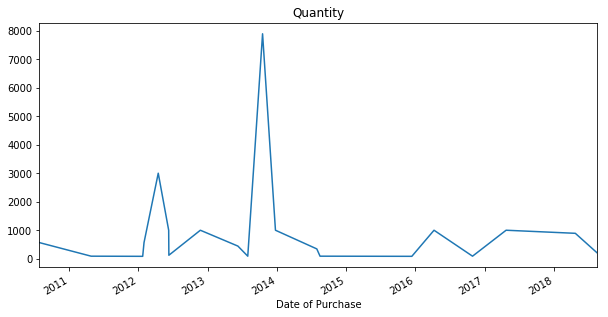

In [37]:
data['Quantity'].plot(title='Quantity', figsize=(10,5))

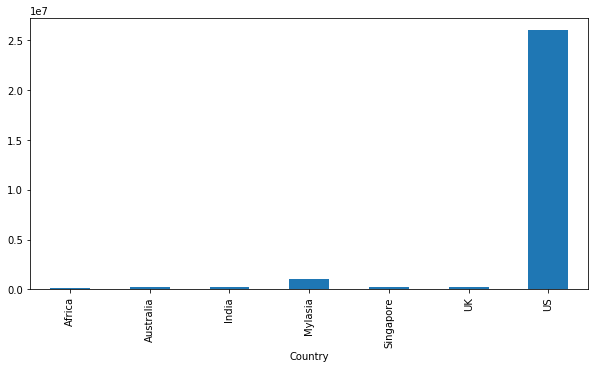

In [38]:
data.groupby(['Country']).agg('max')['Total'].plot.bar(figsize=(10,5))

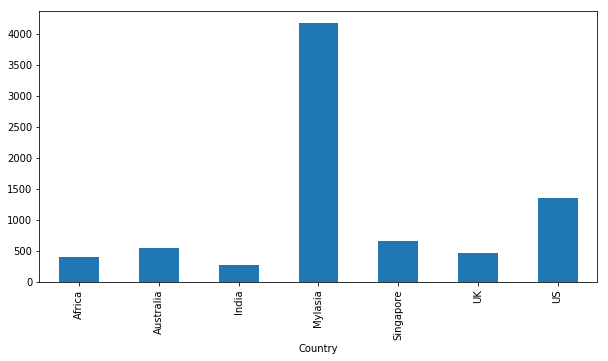

In [39]:
data.groupby(['Country']).agg('mean')['Quantity'].plot.bar(figsize=(10,5))

Применение функций к столбцу

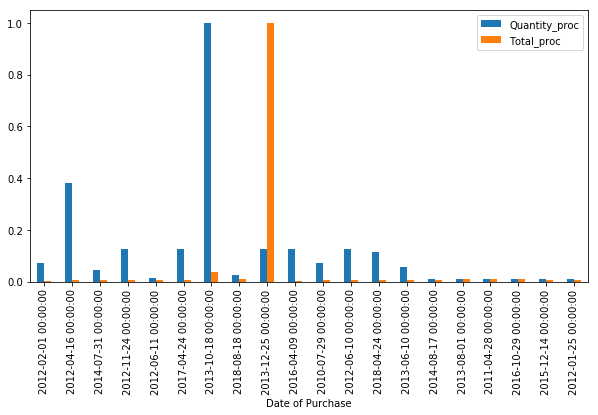

In [40]:
data['Quantity_proc'] = data['Quantity'].apply(lambda x: x/data['Quantity'].max())
data['Total_proc'] = data['Total'].apply(lambda x: x/data['Total'].max())

data[['Quantity_proc', 'Total_proc']].plot.bar(figsize=(10,5))

# 3. Задание.

__1. Сколько уникальных Sales Person? (уникальность считается по паре страна, регион)__

In [ ]:
# Ваш код 

__2. В каком году было больше всего продаж? (Total)__

In [ ]:
# Ваш код 

__3. Нарисуйте barplot количества продаж (Total) по годам__

In [ ]:
# Ващ код

__4. Сделайте min-max scaling столбца Total__

Структура min_max:

    min = минимальный элемент в столбце
    max = максимальный элемент в столбце
    
    x_new = (x-min)/(max-min)

In [ ]:
# Ващ код

__5. Постройте график (barplot) для полученных в прошлом номере значений__

In [ ]:
# Ващ код